In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ODE: $ y' - y = -\frac{1}{2}e^{\frac{t}{2}}\text{sin}(5t)+5e^{\frac{t}{2}}\text{cos}(5t),~y(0)=0$

Solution to ODE: $y(t) = e^{\frac{t}{2}}\text{sin}(5t)$

In [3]:
# Compute actual solution
t = np.linspace(start=0,stop=5, num=10000)
y = np.exp(t/2)*np.sin(5*t)

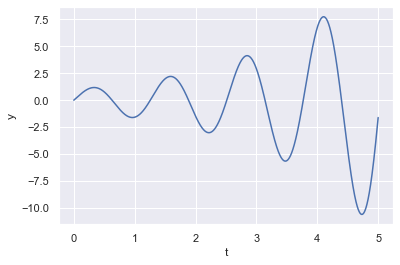

In [4]:
fig,ax=plt.subplots()
ax.plot(t,y)
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()

#### Implement Euler's method
Pseudocode: Given initial value $y_0$, initial time $t_0$, step size $h$
- Compute derivative at $t_0$, $\frac{\text{d}y}{\text{d}{t}}\big|_{t=t_0}$
- $y_1 = y_0 + h\frac{\text{d}y}{\text{d}{t}}\big|_{t=t_0}$
- $t_1 = t_0 +h$
- $y_0 = y_1$, $t_0=t_1$

In [5]:
def euler_method(dy_dt, y0, t0, h, n_steps):
    '''Function to compute numerical approximation of ODE. 
    Args: - dy_dt is a function which takes in y,t and represents the derivative
          - y0 and t0 represent the initial value and time, respectively
          - h is the step size (fixed, in this case)
          - n_steps is the number of steps to take'''
    y = [y0]
    t = [t0]
    for _ in range(n_steps):
        m = dy_dt(t0,y0) # compute derivative at t0
        y1 = y0 + h*m # approximate next value
        t1 = t0 + h
        
        y.append(y1) # record values
        t.append(t1)
        
        y0 = y1 # update initial value/time
        t0 = t1
    
    return(t, y)

def rk4(fun, t_span, y0, h):
    '''Runge-Kutta 4th order method
        Args: - fun is derivative
              - t_span is tuple of start and end time
              - y0 is initial condition
              - h is step size (fixed in this case)'''
    weights = torch.tensor([1/6, 1/3, 1/3, 1/6]).view(-1,1)
    n_steps = int((t_span[1]-t_span[0])/h)
    all_y = [y0] # set state to initial state
    all_t = [t_span[0]]
    for _ in range(n_steps):
        y = all_y[-1]
        t = all_t[-1]
        k1 = h * fun(t     , y)
        k2 = h * fun(t+.5*h, y+.5*k1)
        k3 = h * fun(t+.5*h, y+.5*k2)
        k4 = h * fun(t+   h, y+   k3)
        all_y.append(y + torch.sum(weights * torch.cat([k1,k2,k3,k4], dim=0)))
        all_t.append(t + h)
    return(torch.tensor(all_t),torch.tensor(all_y))

def ode1(t,y):
    '''Example differential equation
    Args: y is initial value
          t is time'''
    m = y - (1/2) * np.exp(t/2) * np.sin(5*t) + 5*np.exp(t/2)*np.cos(5*t)
    return m

def ode2(t,y):
    '''Example differential equation
    Args: y is initial value
          t is time'''
    m = y - (1/2) * np.exp(t/2) * np.sin(5*t) + 5*np.exp(t/2)*np.cos(5*t)
    return -m

#### Back to the example:
ODE: $ y' - y = -\frac{1}{2}e^{\frac{t}{2}}\text{sin}(5t)+5e^{\frac{t}{2}}\text{cos}(5t),~y(0)=0$

In [10]:
from scipy.integrate import solve_ivp

# Compute actual solution
t = np.linspace(start=0,stop=5, num=10000)
y = np.exp(t/2)*np.sin(5*t)

# Compute approximate solution
t_hat, y_hat = euler_method(ode1, 0, 0, h=.05, n_steps = 100) # Euler
t_rk , y_rk  = rk4(fun=ode1, y0=torch.tensor([[0.]]), t_span=(0,5), h=.25) # runge-kutta
t_rk2 , y_rk2  = rk4(fun=ode1, y0=torch.tensor([[y_rk[-1]]]), t_span=(5,0), h=-.5) # reverse
res = solve_ivp(fun=ode1, t_span = (0.,5.), y0=np.array([0])) # scipy

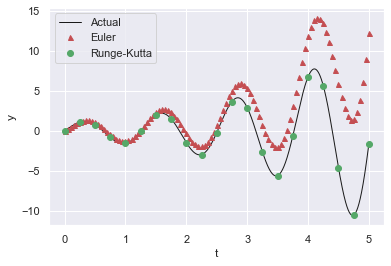

In [23]:
fig,ax=plt.subplots()
ax.plot(t,y, label='Actual', color='k', linewidth=1)
ax.plot(t_hat,y_hat, 'ro', label='Euler', markersize=5, marker='^')
# ax.plot(res.t,res.y.squeeze(0), 'ro', label='scipy')
ax.plot(t_rk.numpy(),y_rk.numpy(), 'go', label='Runge-Kutta')
# ax.plot(t_rk2.numpy(),y_rk2.numpy(), color='purple', marker='o', label='reverse')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()
fig.savefig('figs/ode_example.png',dpi=150)
plt.show()